# Customer Conversion Prediction

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn import tree
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from itertools import combinations
import streamlit as st
import pickle

# Dataset

In [2]:
df = pd.read_csv("C:\\Users\\Revanth\\Desktop\\train.csv")

In [3]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# Data Cleaning

In [4]:
df.shape

(45211, 11)

In [5]:
df["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [6]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [7]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [8]:
df["education_qual"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [9]:
df["call_type"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [10]:
df["day"].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [11]:
df["mon"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [12]:
df["dur"].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [13]:
df["num_calls"].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [14]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [15]:
df = df.drop_duplicates()

In [16]:
df["education_qual"].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [17]:
df["education_qual"] = df["education_qual"].replace("unknown",df["education_qual"].mode()[0])

In [18]:
df["education_qual"].value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [19]:
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [20]:
df["job"]=df["job"].replace("unknown",df["job"].mode()[0])

In [21]:
df.job.value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [22]:
df.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [23]:
df.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [24]:
df.mon.value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [25]:
df.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [26]:
df.y.value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [27]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [28]:
df.shape

(45205, 11)

In [29]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [30]:
IQR = df["dur"].quantile(0.75)-df["dur"].quantile(0.25)
UL = df.dur.quantile(0.75) + (1.5*IQR)
LL = df.dur.quantile(0.25) - (1.5*IQR)
UL, LL

(643.0, -221.0)

In [31]:
df.dur = df.dur.clip(LL, UL)

In [32]:
IQR = df["num_calls"].quantile(0.75)-df["num_calls"].quantile(0.25)
UL = df.num_calls.quantile(0.75) + (1.5*IQR)
LL = df.num_calls.quantile(0.25) - (1.5*IQR)
UL, LL

(6.0, -2.0)

In [33]:
df.num_calls = df.num_calls.clip(LL, UL)

In [34]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235
std,10.619130,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,95.000000,31.00000,643.00000,6.000000


In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
df["target"] = df["y"].map({"yes":1, "no":0})

In [37]:
df.groupby("prev_outcome")["target"].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
 11  target          45205 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.5+ MB


In [39]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
target             int64
dtype: object

In [40]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0


# Exploratory Data Analysis

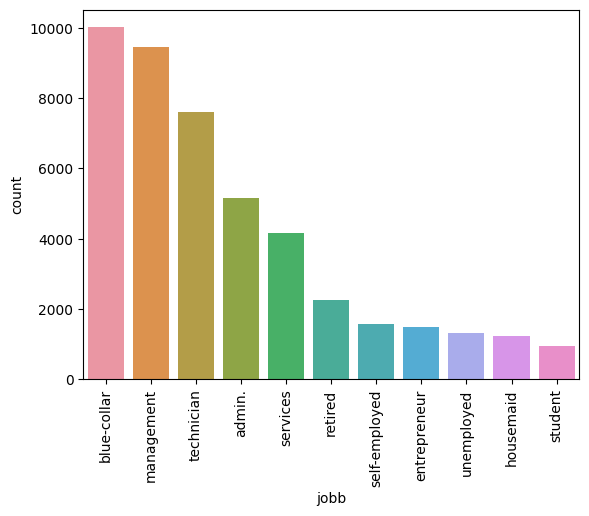

In [41]:
df_j = pd.DataFrame(df.job.value_counts()).sort_values("job", ascending=False).reset_index()
df_j.rename(columns = {"index":"jobb","job":"count"}, inplace=True)
bar = sns.barplot(x=df_j["jobb"], y=df_j["count"], data=df_j)
bar.tick_params(axis="x", rotation=90)

<AxesSubplot: ylabel='job'>

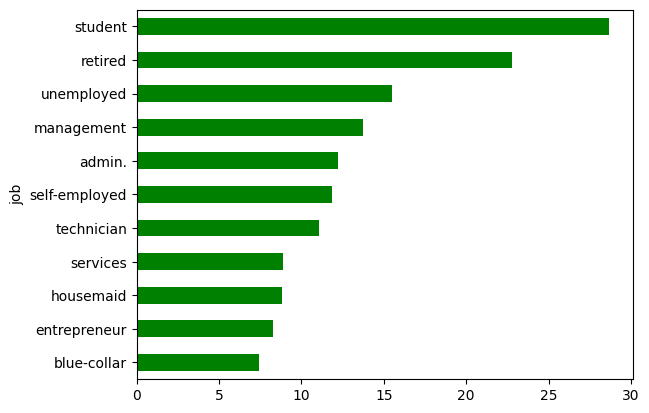

In [42]:
(df.groupby("job")["target"].mean()*100).sort_values().plot(kind="barh", color="green")

<AxesSubplot: ylabel='marital'>

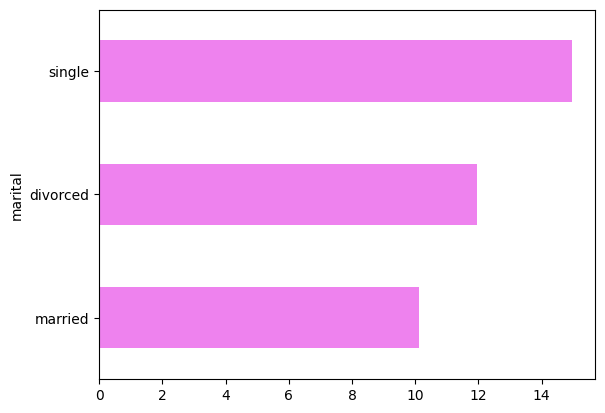

In [43]:
(df.groupby("marital")["target"].mean()*100).sort_values().plot(kind="barh", color="violet")

<AxesSubplot: ylabel='education_qual'>

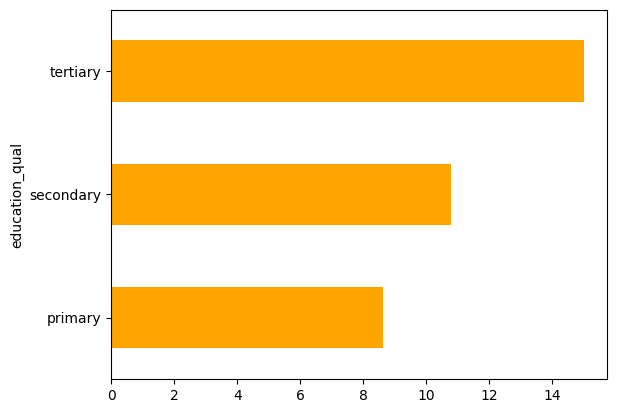

In [44]:
(df.groupby("education_qual")["target"].mean()*100).sort_values().plot(kind="barh", color="orange")

<AxesSubplot: ylabel='call_type'>

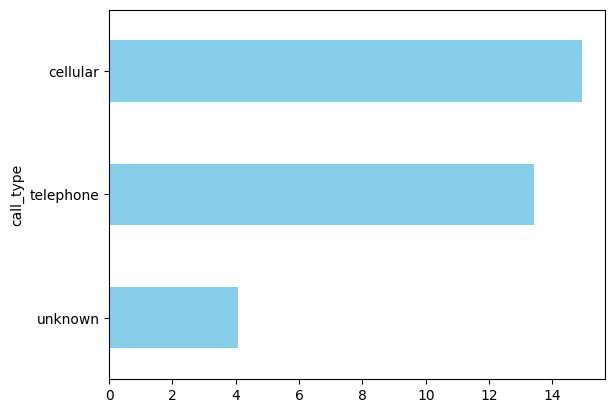

In [45]:
(df.groupby("call_type")["target"].mean()*100).sort_values().plot(kind="barh", color="skyblue")

<AxesSubplot: ylabel='mon'>

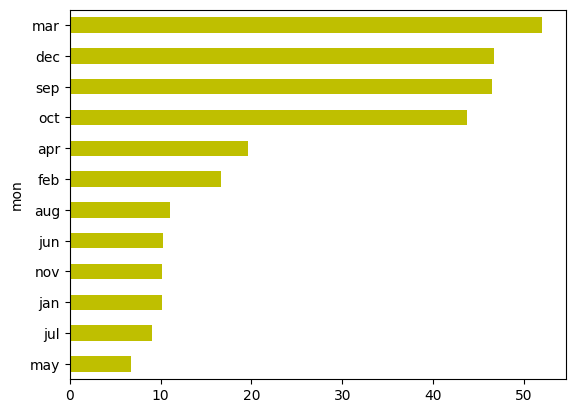

In [46]:
(df.groupby("mon")["target"].mean()*100).sort_values().plot(kind="barh", color="y")

<AxesSubplot: ylabel='prev_outcome'>

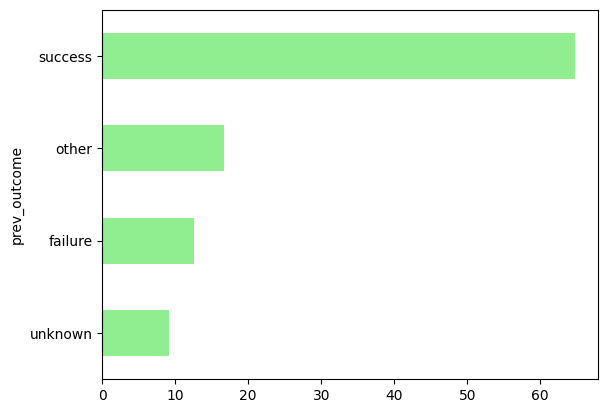

In [47]:
(df.groupby("prev_outcome")["target"].mean()*100).sort_values().plot(kind="barh", color="lightgreen")

# Data Encoding

In [48]:
col = df["job"].unique()
P=[]
for i in col:
 p =  len(df[df["job"]==i][df["y"]=="yes"])/len(df[df["job"]==i])
 P.append(p)
dff = pd.DataFrame({"job":col, "%":P})
dff = dff.sort_values("%", ascending=True)
dff = dff.reset_index()
del dff["index"]

In [49]:
dff

,job,%
0,blue-collar,0.074067
1,entrepreneur,0.082717
2,housemaid,0.087903
3,services,0.088851
4,technician,0.110585
5,self-employed,0.118429
6,admin.,0.122050
7,management,0.137570
8,unemployed,0.155027
9,retired,0.227915


In [50]:
df["job"] = df["job"].map({dff["job"][0]:0, dff["job"][1]:1, dff["job"][2]:2, dff["job"][3]:3, dff["job"][4]:4, dff["job"][5]:5, dff["job"][6]:6, dff["job"][7]:7, dff["job"][8]:8, dff["job"][9]:9, dff["job"][10]:10})

In [51]:
col = df["marital"].unique()
P=[]
for i in col:
 p =  len(df[df["marital"]==i][df["y"]=="yes"])/len(df[df["marital"]==i])
 P.append(p)
dff = pd.DataFrame({"marital":col, "%":P})
dff = dff.sort_values("%", ascending=True)
dff = dff.reset_index()
del dff["index"]

In [52]:
dff

,marital,%
0,married,0.101250
1,divorced,0.119455
2,single,0.149515


In [53]:
df["marital"] = df["marital"].map({dff["marital"][0]:0, dff["marital"][1]:1, dff["marital"][2]:2})

In [54]:
col = df["education_qual"].unique()
P=[]
for i in col:
 p =  len(df[df["education_qual"]==i][df["y"]=="yes"])/len(df[df["education_qual"]==i])
 P.append(p)
dff = pd.DataFrame({"education_qual":col, "%":P})
dff = dff.sort_values("%", ascending=True)
dff = dff.reset_index()
del dff["index"]

In [55]:
dff

,education_qual,%
0,primary,0.086277
1,secondary,0.107838
2,tertiary,0.150086


In [56]:
df["education_qual"] = df["education_qual"].map({dff["education_qual"][0]:0, dff["education_qual"][1]:1, dff["education_qual"][2]:2})

In [57]:
col = df["call_type"].unique()
P=[]
for i in col:
 p =  len(df[df["call_type"]==i][df["y"]=="yes"])/len(df[df["call_type"]==i])
 P.append(p)
dff = pd.DataFrame({"call_type":col, "%":P})
dff = dff.sort_values("%", ascending=True)
dff = dff.reset_index()
del dff["index"]

In [58]:
dff

,call_type,%
0,unknown,0.040716
1,telephone,0.134205
2,cellular,0.149204


In [59]:
df["call_type"] = df["call_type"].map({dff["call_type"][0]:0, dff["call_type"][1]:1, dff["call_type"][2]:2})

In [60]:
col = df["mon"].unique()
P=[]
for i in col:
 p =  len(df[df["mon"]==i][df["y"]=="yes"])/len(df[df["mon"]==i])
 P.append(p)
dff = pd.DataFrame({"mon":col, "%":P})
dff = dff.sort_values("%", ascending=True)
dff = dff.reset_index()
del dff["index"]

In [61]:
dff

,mon,%
0,may,0.067199
1,jul,0.090949
2,jan,0.101212
3,nov,0.101511
4,jun,0.102266
5,aug,0.110168
6,feb,0.166478
7,apr,0.196794
8,oct,0.437669
9,sep,0.464594


In [62]:
df["mon"] = df["mon"].map({dff["mon"][0]:0, dff["mon"][1]:1, dff["mon"][2]:2, dff["mon"][3]:3, dff["mon"][4]:4, dff["mon"][5]:5, dff["mon"][6]:6, dff["mon"][7]:7, dff["mon"][8]:8, dff["mon"][9]:9, dff["mon"][10]:10, dff["mon"][11]:11})

In [63]:
col = df["prev_outcome"].unique()
P=[]
for i in col:
 p =  len(df[df["prev_outcome"]==i][df["y"]=="yes"])/len(df[df["prev_outcome"]==i])
 P.append(p)
dff = pd.DataFrame({"prev_outcome":col, "%":P})
dff = dff.sort_values("%", ascending=True)
dff = dff.reset_index()
del dff["index"]

In [64]:
dff

,prev_outcome,%
0,unknown,0.091630
1,failure,0.126097
2,other,0.166848
3,success,0.647253


In [65]:
df["prev_outcome"] = df["prev_outcome"].map({dff["prev_outcome"][0]:0, dff["prev_outcome"][1]:1, dff["prev_outcome"][2]:2, dff["prev_outcome"][3]:3})

In [66]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7,0,2,0,5,0,261,1,0,no,0
1,44,4,2,1,0,5,0,151,1,0,no,0
2,33,1,0,1,0,5,0,76,1,0,no,0
3,47,0,0,1,0,5,0,92,1,0,no,0
4,33,0,2,1,0,5,0,198,1,0,no,0


In [67]:
df.describe()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
count,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,45205.00000,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,4.249618,0.680964,1.142661,1.359805,15.80688,2.856122,234.95620,2.392235,0.290101,0.117000
std,10.619130,2.969312,0.884900,0.652213,0.897927,8.32234,2.715405,176.75476,1.600152,0.698508,0.321424
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.00000,1.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,1.000000,0.000000,8.00000,0.000000,103.00000,1.000000,0.000000,0.000000
50%,39.000000,4.000000,0.000000,1.000000,2.000000,16.00000,3.000000,180.00000,2.000000,0.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,2.000000,21.00000,5.000000,319.00000,3.000000,0.000000,0.000000
max,95.000000,10.000000,2.000000,2.000000,2.000000,31.00000,11.000000,643.00000,6.000000,3.000000,1.000000


# Splitting of Dataset

In [68]:
col = [*df.columns]
col[:-2]

['age',
 'job',
 'marital',
 'education_qual',
 'call_type',
 'day',
 'mon',
 'dur',
 'num_calls',
 'prev_outcome']

In [69]:
x = df.loc[:, col[:-2]].values
y = df.loc[:, col[-1]].values

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Balancing Dataset using SMOTEENN

In [71]:
df.shape

(45205, 12)

In [72]:
len(x_train),len(y_train)

(33903, 33903)

In [73]:
smt = SMOTEENN(sampling_strategy="all")
x_smt, y_smt = smt.fit_resample(x_train, y_train)

In [74]:
len(x_smt),len(y_smt)

(50127, 50127)

In [75]:
df_bal = pd.DataFrame(x_smt, columns= df.columns[:-2])

In [76]:
df_bal["y"] = y_smt

In [77]:
len(df_bal[df_bal["y"]==1])/len(df_bal)

0.5622718295529355

# Model : Logistic Regression

In [78]:
lr = LogisticRegression()
lr.fit(x_smt,y_smt)
lr.score(x_test,y_test)
log = roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])

<AxesSubplot: >

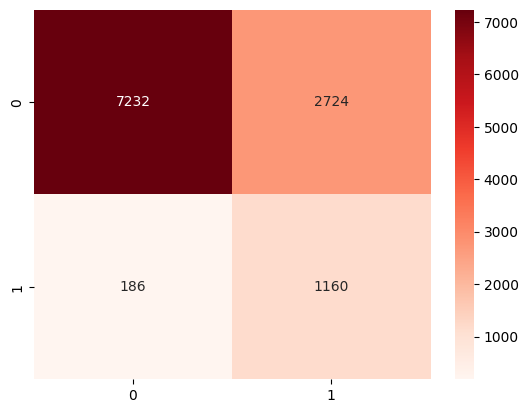

In [79]:
sns.heatmap(confusion_matrix(y_test, lr.predict(x_test)), annot=True,  fmt='3g', cmap="Reds")

# Model : KNN

In [80]:
KNN = KNeighborsClassifier()
KNN.fit(x_smt, y_smt)
KNN.score(x_test, y_test)

0.7485400814015218

In [81]:
k = roc_auc_score(y_test, KNN.predict_proba(x_test)[:, 1])

<AxesSubplot: >

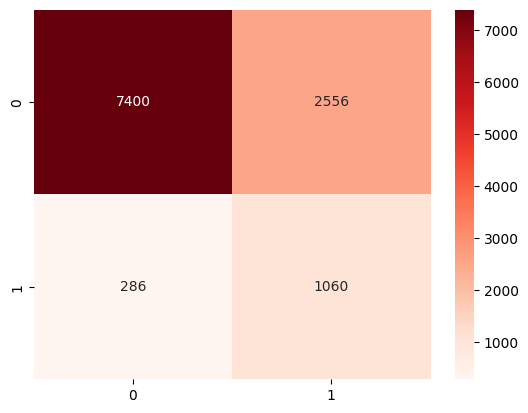

In [82]:
sns.heatmap(confusion_matrix(y_test, KNN.predict(x_test)), annot=True,  fmt='3g', cmap="Reds")

# Model : Decision Tree

In [83]:
dt = DecisionTreeClassifier()
dt.fit(x_smt, y_smt)
dt.score(x_test, y_test)

0.8256060874181561

In [84]:
d = roc_auc_score(y_test, dt.predict_proba(x_test)[:, 1])

<AxesSubplot: >

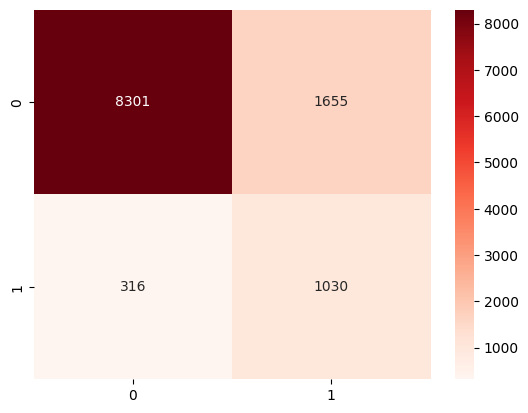

In [85]:
sns.heatmap(confusion_matrix(y_test, dt.predict(x_test)), annot=True,  fmt='3g', cmap="Reds")

# Model : Random Forest

In [86]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features="sqrt")
rf.fit(x_smt, y_smt)

RandomForestClassifier(max_depth=4)

In [87]:
r = roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])

<AxesSubplot: >

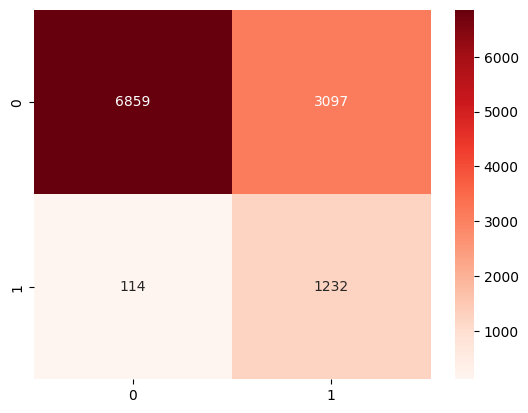

In [88]:
sns.heatmap(confusion_matrix(y_test, rf.predict(x_test)), annot=True,  fmt='3g', cmap="Reds")

# Model : XGBoost

In [89]:
xgg = xgb.XGBClassifier(n_estimators=100, verbosity=0)
xgg.fit(x_smt, y_smt)
xgg.score(x_smt, y_smt)

0.9801504179384364

In [90]:
g = roc_auc_score(y_test, xgg.predict_proba(x_test)[:,1])

In [91]:
xgg.predict([[50,8,1,2,1,3,9,260,2,1]])

array([1])

<AxesSubplot: >

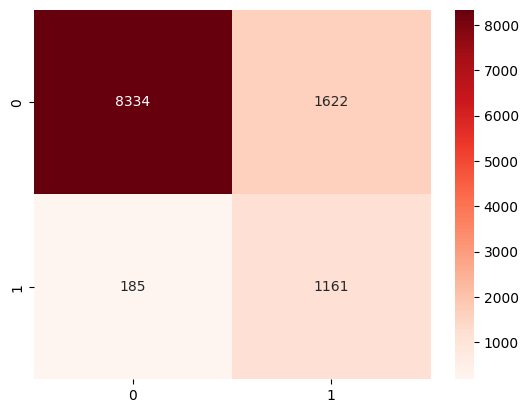

In [92]:
sns.heatmap(confusion_matrix(y_test, xgg.predict(x_test)), annot=True,  fmt='3g', cmap="Reds")

# Model : Ensemble Learning - Voting Classifier 

In [93]:
m1 = LogisticRegression()
m2 = tree.DecisionTreeClassifier()
m3 = KNeighborsClassifier()
m4 = xgb.XGBClassifier(n_estimators=100, verbosity=0)
m5 = RandomForestClassifier(n_estimators=100, max_depth=5, max_features="sqrt")
m = VotingClassifier(estimators=[("lr",m1),("dt",m2),("knn",m3),("xgb",m4),("rf",m5)], voting="soft")

In [94]:
m.fit(x_smt, y_smt)
m.score(x_smt, y_smt)

0.9911424980549405

In [95]:
v = roc_auc_score(y_test, m.predict_proba(x_test)[:,1])

<AxesSubplot: >

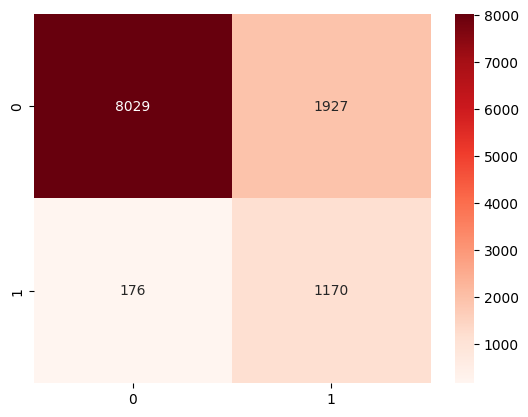

In [96]:
sns.heatmap(confusion_matrix(y_test, m.predict(x_test)), annot=True,  fmt='3g', cmap="Reds")

In [97]:
pd.DataFrame({"Model":["Logistic Regression", "KNN","Decision Tree", "Random Forest", "XGBoost","Voting Classifier"],"AUROC":[log,k,d,r,g,v]})

,Model,AUROC
0,Logistic Regression,0.869516
1,KNN,0.813012
2,Decision Tree,0.799499
3,Random Forest,0.885704
4,XGBoost,0.916954
5,Voting Classifier,0.903275


## Hyper Parameter Tuning

In [98]:
X = df.loc[:, col[:-2]].values
Y = df.loc[:, col[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y)
pipeline = imbpipeline(steps = [['smoteenn', SMOTEENN()],
                               ['classifier', XGBClassifier(learning_rate=0.5, n_estimators=100, verbosity=0)]])
stratified_kfold = StratifiedKFold(n_splits=10,
                                     shuffle=True)
param_grid = {'classifier__C':[0.1, 0.15, 0.2, 0.25, 0.3, 1]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score} Test score: {test_score}')

Cross-validation score: 0.9088269539260964 Test score: 0.9133391215107978


In [99]:
lr=grid_search.best_params_["classifier__C"]
lr

0.15

## Feature Importances

In [100]:
imp_ft = pd.DataFrame({"ft":col[:-2], "imp":xgg.feature_importances_})
imp_ft.sort_values("imp", ascending=False, inplace=True)

In [101]:
imp_ft.iloc[0:5,0].values

array(['call_type', 'dur', 'mon', 'prev_outcome', 'num_calls'],
      dtype=object)

In [102]:
x_imp = df.loc[:, imp_ft.iloc[0:5,0]].values
y = df.loc[:, col[-1]].values
x_train_imp, x_test_imp, y_train, y_test = train_test_split(x_imp, y, test_size=0.25)

In [103]:
smt = SMOTEENN(sampling_strategy="all")
x_smt_imp, y_smt = smt.fit_resample(x_train_imp, y_train)

In [104]:
df_bal_imp = pd.DataFrame(x_smt_imp, columns= imp_ft.iloc[0:5,0])
df_bal_imp["y"] = y_smt
len(df_bal_imp[df_bal_imp["y"]==1])/len(df_bal_imp)

0.4192378409691963

In [105]:
xg = xgb.XGBClassifier(learning_rate=lr, n_estimators=100, verbosity=0)
xg.fit(x_smt_imp, y_smt)
g = roc_auc_score(y_test, xg.predict_proba(x_test_imp)[:,1])

In [106]:
g

0.886943715646323

## Feature Combinations

In [107]:
max_roc=[]
best_comb=[]

In [108]:
comb_1 = list(combinations(col[:-2], 1))
auc = []
for i in comb_1:
    x = df.loc[:, i].values
    y = df.loc[:, col[-1]].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    smt = SMOTEENN(sampling_strategy="all")
    x_smt, y_smt = smt.fit_resample(x_train, y_train)
    xgg = xgb.XGBClassifier(learning_rate=lr, n_estimators=100, verbosity=0)
    xgg.fit(x_smt, y_smt)
    g = roc_auc_score(y_test, xgg.predict_proba(x_test)[:,1])
    auc.append(g)
max_roc.append(max(auc))
ind = auc.index(max(auc))
best_ft = comb_1[ind]
best_comb.append(best_ft)

In [109]:
comb_2 = list(combinations(col[:-2], 2))
auc_2 = []
for i in comb_2:
    x = df.loc[:, i].values
    y = df.loc[:, col[-1]].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    smt = SMOTEENN(sampling_strategy="all")
    x_smt, y_smt = smt.fit_resample(x_train, y_train)
    xgg = xgb.XGBClassifier(learning_rate=lr, n_estimators=100, verbosity=0)
    xgg.fit(x_smt, y_smt)
    g = roc_auc_score(y_test, xgg.predict_proba(x_test)[:,1])
    auc_2.append(g)
max_roc.append(max(auc_2))
ind = auc_2.index(max(auc_2))
best_ft = comb_2[ind]
best_comb.append(best_ft)

In [110]:
comb_3 = list(combinations(col[:-2], 3))
auc_3 = []
for i in comb_3:
    x = df.loc[:, i].values
    y = df.loc[:, col[-1]].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    smt = SMOTEENN(sampling_strategy="all")
    x_smt, y_smt = smt.fit_resample(x_train, y_train)
    xgg = xgb.XGBClassifier(learning_rate=lr, n_estimators=100, verbosity=0)
    xgg.fit(x_smt, y_smt)
    g = roc_auc_score(y_test, xgg.predict_proba(x_test)[:,1])
    auc_3.append(g)
max_roc.append(max(auc_3))
ind = auc_3.index(max(auc_3))
best_ft = comb_3[ind]
best_comb.append(best_ft)

In [111]:
comb_4 = list(combinations(col[:-2], 4))
auc_4 = []
for i in comb_4:
    x = df.loc[:, i].values
    y = df.loc[:, col[-1]].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    smt = SMOTEENN(sampling_strategy="all")
    x_smt, y_smt = smt.fit_resample(x_train, y_train)
    xgg = xgb.XGBClassifier(learning_rate=lr, n_estimators=100, verbosity=0)
    xgg.fit(x_smt, y_smt)
    g = roc_auc_score(y_test, xgg.predict_proba(x_test)[:,1])
    auc_4.append(g)
max_roc.append(max(auc_4))
ind = auc_4.index(max(auc_4))
best_ft = comb_4[ind]
best_comb.append(best_ft)

In [112]:
comb_5 = list(combinations(col[:-2], 5))
auc_5 = []
for i in comb_5:
    x = df.loc[:, i].values
    y = df.loc[:, col[-1]].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    smt = SMOTEENN(sampling_strategy="all")
    x_smt, y_smt = smt.fit_resample(x_train, y_train)
    xgg = xgb.XGBClassifier(learning_rate=lr, n_estimators=100, verbosity=0)
    xgg.fit(x_smt, y_smt)
    g = roc_auc_score(y_test, xgg.predict_proba(x_test)[:,1])
    auc_5.append(g)
max_roc.append(max(auc_5))
ind = auc_5.index(max(auc_5))
best_ft = comb_5[ind]
best_comb.append(best_ft)

In [113]:
comb_6 = list(combinations(col[:-2], 6))
auc_6 = []
for i in comb_6:
    x = df.loc[:, i].values
    y = df.loc[:, col[-1]].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    smt = SMOTEENN(sampling_strategy="all")
    x_smt, y_smt = smt.fit_resample(x_train, y_train)
    xgg = xgb.XGBClassifier(learning_rate=lr, n_estimators=100, verbosity=0)
    xgg.fit(x_smt, y_smt)
    g = roc_auc_score(y_test, xgg.predict_proba(x_test)[:,1])
    auc_6.append(g)
max_roc.append(max(auc_6))
ind = auc_6.index(max(auc_6))
best_ft = comb_6[ind]
best_comb.append(best_ft)

In [114]:
comb_7 = list(combinations(col[:-2], 7))
auc_7 = []
for i in comb_7:
    x = df.loc[:, i].values
    y = df.loc[:, col[-1]].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    smt = SMOTEENN(sampling_strategy="all")
    x_smt, y_smt = smt.fit_resample(x_train, y_train)
    xgg = xgb.XGBClassifier(learning_rate=lr, n_estimators=100, verbosity=0)
    xgg.fit(x_smt, y_smt)
    g = roc_auc_score(y_test, xgg.predict_proba(x_test)[:,1])
    auc_7.append(g)
max_roc.append(max(auc_7))
ind = auc_7.index(max(auc_7))
best_ft = comb_7[ind]
best_comb.append(best_ft)

In [115]:
comb_8 = list(combinations(col[:-2], 8))
auc_8 = []
for i in comb_8:
    x = df.loc[:, i].values
    y = df.loc[:, col[-1]].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    smt = SMOTEENN(sampling_strategy="all")
    x_smt, y_smt = smt.fit_resample(x_train, y_train)
    xgg = xgb.XGBClassifier(learning_rate=lr, n_estimators=100, verbosity=0)
    xgg.fit(x_smt, y_smt)
    g = roc_auc_score(y_test, xgg.predict_proba(x_test)[:,1])
    auc_8.append(g)
max_roc.append(max(auc_8))
ind = auc_8.index(max(auc_8))
best_ft = comb_8[ind]
best_comb.append(best_ft)

In [116]:
comb_9 = list(combinations(col[:-2], 9))
auc_9 = []
for i in comb_9:
    x = df.loc[:, i].values
    y = df.loc[:, col[-1]].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    smt = SMOTEENN(sampling_strategy="all")
    x_smt, y_smt = smt.fit_resample(x_train, y_train)
    xgg = xgb.XGBClassifier(learning_rate=lr, n_estimators=100, verbosity=0)
    xgg.fit(x_smt, y_smt)
    g = roc_auc_score(y_test, xgg.predict_proba(x_test)[:,1])
    auc_9.append(g)
max_roc.append(max(auc_9))
ind = auc_9.index(max(auc_9))
best_ft = comb_9[ind]
best_comb.append(best_ft)

In [117]:
ind = max_roc.index(max(max_roc))
best_ft = [*best_comb[ind]]
best_ft

['marital', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']

In [118]:
max_roc

[0.713568431578825,
 0.8193648025631514,
 0.8868228522258433,
 0.8982096121485064,
 0.9119725785647925,
 0.9206844706442777,
 0.9243371018670576,
 0.9186022531678018,
 0.9193297123534014]

## Fitting the Best Model 

In [119]:
x = df.loc[:, best_ft].values
y = df.loc[:, col[-1]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
smt = SMOTEENN(sampling_strategy="all")
x_smt, y_smt = smt.fit_resample(x_train, y_train)
xgg_b = xgb.XGBClassifier(learning_rate=lr, n_estimators=100, verbosity=0)
xgg_b.fit(x_smt, y_smt)
g_b = roc_auc_score(y_test, xgg_b.predict_proba(x_test)[:,1])
print(g_b)

0.9186187998620268


In [120]:
max(max_roc)

0.9243371018670576

### Result

I have witnessed that the combination of ['marital', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome'] as the best feature combination which yields around 0.92 AUROC score.

## Model Deployment

In [121]:
pickle_file = open("Cust_Conv_Pred.pkl","wb")
pickle.dump(xgg_b, pickle_file)
pickle_file.close()

In [122]:
pickle_open = open("Cust_Conv_Pred.pkl","rb")
p_xg=pickle.load(pickle_open)

### Suggestions

1. Target customer for this product is "Students", because their conversion ratio is quite higher. Rather than targetting people with "Blue-Collar" job title which has lesser conversion rate and the attempts made are huge.

2. Likewise, people who are "Single" also has good conversion rate than other categories.

3. Also, March month has huge conversion rate. Targetting people actively in march month will be huge success for the company.